In [236]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [237]:
sample_size = 100
xx = np.random.normal(0,1,sample_size)
yy = -1.5 + 2 * xx

In [238]:
yy = yy + np.random.normal(0,1)
yy

array([-0.7131152 , -4.16728696,  1.6261506 , -2.52817818, -0.89459881,
       -0.19905001, -0.77189274, -2.74247047, -0.08971034, -2.57154127,
       -2.60412212, -0.01687629, -2.58847819, -3.01140204, -2.49380582,
       -3.34385475, -0.24544069, -0.17867411,  0.47560332,  1.0457152 ,
       -2.65219908,  1.26025991,  1.80206247,  3.08796701, -2.25778019,
       -4.22267187, -2.19064106, -3.16038427, -2.64753957,  1.45452387,
       -0.32632058, -0.80425991, -2.3979744 ,  0.97429806, -0.79593572,
        0.55927258, -0.52394641, -1.55971014, -0.45499255, -2.97398649,
       -2.11707542, -1.0966185 ,  1.13804732,  3.43508076, -1.97155003,
       -0.09764899, -1.88841604, -3.45609201, -1.84972417,  0.13746678,
       -3.62637668, -4.2742391 ,  1.38571608, -1.82862248, -3.09050201,
       -1.32066731, -1.25977356,  0.68426908, -3.06407153, -1.02441417,
       -0.55760053, -2.9798465 , -0.70231948, -0.1280196 , -1.88923178,
        1.2489293 , -1.15800974,  3.70660215, -2.82066894, -1.65

In [239]:
x_ = np.random.normal(loc=0, scale=10, size=200)

In [240]:
x_

array([ 2.91171999e+00,  5.65479375e+00,  3.31290922e+00, -2.09298261e+01,
        3.80656510e+00,  1.90767521e+00, -6.45938799e-01, -1.08415184e+01,
        1.75146995e+01,  1.07334739e+01,  4.47273874e+00,  2.54733003e+01,
       -1.63140294e+01,  4.05815400e+00,  6.99140839e+00, -1.05062367e+00,
       -3.03932372e+00,  9.14438018e+00,  8.13775179e+00, -8.56904140e-01,
        5.50009689e-01,  5.31421705e+00,  4.71261313e+00, -7.45871896e-01,
        3.59961077e+00, -1.51229438e+01,  1.65245172e+01,  1.72788848e+00,
       -8.89988883e+00,  3.75058037e+00, -1.05113437e+01, -9.85202829e+00,
        6.67031279e+00, -1.20106016e+01, -3.76665211e+00, -9.61091408e+00,
        5.64127704e-01,  5.88127129e+00, -3.21120612e+00, -2.07857198e+01,
       -4.13100661e+01,  6.17474084e+00,  8.68794715e-02, -1.06573011e+01,
       -1.25174587e+01,  3.15106894e+00, -8.77341626e-01, -1.29964362e+01,
        5.72983674e+00,  4.01658410e+00, -5.56635389e+00,  6.84611301e-01,
        2.52678890e+01, -

In [241]:
y_ = -1.5 + 2 * x_

In [242]:
y_ += (np.random.random(200) - .5) * 20

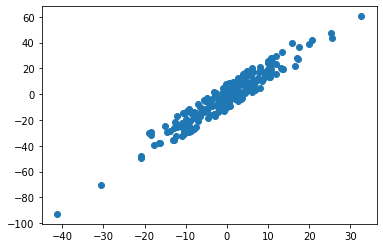

In [243]:
plt.scatter(x=x_, y=y_)

In [244]:
def make_line (x, w0, w1):
    ypred = w0 + w1 * x
    return ypred

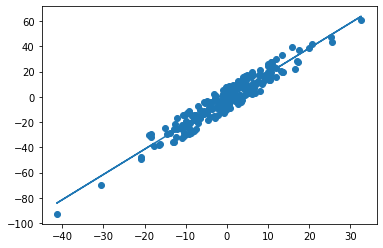

In [245]:
plt.scatter(x=x_, y=y_)
plt.plot(x_, make_line(x_, -1.5, 2))

In [246]:
def mse(ytrue, ypred):
    error = np.mean((ytrue-ypred)**2)
    return (error)

In [247]:
a = np.array([1.0, 1.2, 1.4, 1.6])
b = np.array([0.2, 0.4, 0.6, 0.8])

assert round(mse(a,b), 2) == 0.64

In [248]:
def calc_gradient(x, ytrue, w0, w1):

  dw = 0.0001
  ypred = make_line(x, w0, w1)

#  '''tweak first parameter'''
  w1_change = w1 + dw
  # calculate predictions using w0 and w1_change
  ypred_w1 = make_line(x, w0, w1_change)
  deriv_w1 = (mse(ytrue, ypred_w1) - mse(ytrue, ypred)) / dw

#  '''tweak second parameter'''
  w0_change = w0 + dw
  # calculate predictions using w0_change and w1
  ypred_w0 = make_line(x, w0_change, w1)
  deriv_w0 = (mse(ytrue, ypred_w0) - mse(ytrue, ypred)) / dw

  return [deriv_w0, deriv_w1] # return both derivations as a list

In [252]:
# gradient loop

w0 = 0 # arbitrary starting value
w1 = 5.0 # arbitrary starting value
LR = 0.01 # choose a small learning rate - step size in gradient descent
MAX_ITER = 500 # - try to find best answer in max 500 steps

gradients = calc_gradient


for i in range(MAX_ITER):
    gradient = calc_gradient(x_, y_, w0, w1)        
    print(f"i: {i}, g0: {gradient[0]}, g1: {gradient[1]}, w0: {w0}, w1: {w1}")            
    w0 = w0 - LR * gradient[0]
    w1 = w1 - LR * gradient[1]    
    plt.figure(figsize=(15,10))
    plt.axis([-40.0, 40.0, -50.0, 100.0])
    plt.scatter(x=x_, y=y_)
    plt.plot(x_, make_line(x_, -1.5, 2), color = 'purple')
    plt.plot(x_, make_line(x_, w0, w1))    
    plt.savefig(f'gradientdescent{i}.png')
    plt.close()
    if abs (gradient[0]) < 0.01 and abs(gradient[1]) < 0.01:
        break
    
    
#fig, ax = plt.subplots()
#ax.scatter (x)
#          1. Calculate the gradient of the loss function
#         with respect to each model parameter.
#      2. If the gradient becomes really close to zero,
#         break out of the loop.
#      3. For each model parameter,
#         - calculate the updated parameter value
#           using the formula from above.
#         - overwrite the value with its updated value.
#      4. Print all variables to check if they
#         are converging to their expected values.

i: 0, g0: 2.674403245919166, g1: 559.4073136660427, w0: 0, w1: 5.0
i: 1, g0: 3.7076021021675842, g1: -487.4153919752189, w0: -0.026744032459191658, w1: -0.5940731366604268
i: 2, g0: 2.6866123630497896, g1: 424.70007051747416, w0: -0.0638200534808675, w1: 4.280080783091762
i: 3, g0: 3.457889015976434, g1: -370.04278132314994, w0: -0.0906861771113654, w1: 0.03308007791702039
i: 4, g0: 2.669897854730152, g1: 322.43094252180526, w0: -0.12526506727112974, w1: 3.7335078911485198
i: 5, g0: 3.2428440303533534, g1: -280.9340781720948, w0: -0.15196404581843126, w1: 0.5091984659304671
i: 6, g0: 2.6322535103417977, g1: 244.78867893520828, w0: -0.1843924861219648, w1: 3.3185392476514153
i: 7, g0: 3.055127172046923, g1: -213.2831986148176, w0: -0.21071502122538277, w1: 0.8706524582993325
i: 8, g0: 2.5797074448519197, g1: 185.84301515659263, w0: -0.241266292945852, w1: 3.0034844444475084
i: 9, g0: 2.8891260490127024, g1: -161.92299604369964, w0: -0.2670633673943712, w1: 1.1450542928815821
i: 10, g0: 

i: 81, g0: 0.635027302635649, g1: -0.007314396341939755, w0: -1.3101775224200196, w1: 2.0092217705179394
i: 82, g0: 0.622312547875481, g1: 0.00760673508182208, w0: -1.316527795446376, w1: 2.0092949144813588
i: 83, g0: 0.609881073643237, g1: -0.0054189859355346925, w0: -1.322750920925131, w1: 2.0092188471305406
i: 84, g0: 0.5976729253376334, g1: 0.005906385212028908, w0: -1.3288497316615633, w1: 2.009273036989896
i: 85, g0: 0.5857309403722866, g1: -0.003985307941434257, w0: -1.3348264609149396, w1: 2.0092139731377756
i: 86, g0: 0.5740085798322525, g1: 0.004610285273543013, w0: -1.3406837703186625, w1: 2.00925382621719
i: 87, g0: 0.5625373641038323, g1: -0.002901964819557179, w0: -1.346423856116985, w1: 2.0092077233644545
i: 88, g0: 0.5512809795504836, g1: 0.003621295903144528, w0: -1.3520492297580233, w1: 2.00923674301265
i: 89, g0: 0.54026239446614, g1: -0.0020843924630753463, w0: -1.3575620395535282, w1: 2.0092005300536186
i: 90, g0: 0.529453097541932, g1: 0.0028656613437760825, w0: -

i: 158, g0: 0.1340491462542559, g1: 0.00014085365762639412, w0: -1.5606879892295922, w1: 2.0090015612221634
i: 159, g0: 0.13136843691086142, g1: 0.0001376715630385661, w0: -1.5620284806921347, w1: 2.009000152685587
i: 160, g0: 0.12874133552998046, g1: 0.00013523667519166338, w0: -1.5633421650612433, w1: 2.008998775969957
i: 161, g0: 0.12616677160792733, g1: 0.0001322549536553197, w0: -1.5646295784165432, w1: 2.008997423603205
i: 162, g0: 0.12364369311512746, g1: 0.0001298516849601583, w0: -1.5658912461326224, w1: 2.0089961010536683
i: 163, g0: 0.1211710713988623, g1: 0.0001270444727197173, w0: -1.5671276830637737, w1: 2.0089948025368187
i: 164, g0: 0.11874789684895859, g1: 0.0001246871761395596, w0: -1.5683393937777623, w1: 2.0089935320920915
i: 165, g0: 0.1163731811004709, g1: 0.0001220339385099578, w0: -1.569526872746252, w1: 2.00899228522033
i: 166, g0: 0.11404595461783629, g1: 0.00011973277480592515, w0: -1.5706906045572566, w1: 2.008991064880945
i: 167, g0: 0.1117652680449055, g1:

i: 237, g0: 0.02717661693907303, g1: 2.8516495831354405e-05, w0: -1.6141297005283661, w1: 2.0089454843531485
i: 238, g0: 0.026633139995624333, g1: 2.7945574743171164e-05, w0: -1.6144014666977569, w1: 2.00894519918819
i: 239, g0: 0.026100531513861824, g1: 2.7387301315684454e-05, w0: -1.614667798097713, w1: 2.0089449197324427
i: 240, g0: 0.02557857406770836, g1: 2.6838975486498384e-05, w0: -1.6149288034128517, w1: 2.0089446458594296
i: 241, g0: 0.025067054778560305, g1: 2.6302942046640965e-05, w0: -1.6151845891535288, w1: 2.0089443774696747
i: 242, g0: 0.024565764675799073, g1: 2.577628777089558e-05, w0: -1.6154352597013144, w1: 2.0089441144402542
i: 243, g0: 0.024074499549442407, g1: 2.526142850456381e-05, w0: -1.6156809173480724, w1: 2.0089438566773765
i: 244, g0: 0.023593058529058908, g1: 2.4755593130976195e-05, w0: -1.6159216623435668, w1: 2.0089436040630915
i: 245, g0: 0.02312124543379923, g1: 2.4261197495434317e-05, w0: -1.6161575929288574, w1: 2.00894335650716
i: 246, g0: 0.022658

In [253]:
# Merge figures into animation = gapminder-animation.gif
import imageio

images = []

for i in range(500):
#    filename = 'animation-frames/life-expectancies{}.png'.format(i)
    images.append(imageio.imread(f'gradientdescent{i}.png'))

imageio.mimsave('gradientdescent-animation.gif', images, fps=10)